In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

In [2]:
from uniflow.flow.client import TransformClient
from uniflow.flow.config import ExpendReduceConfig
from uniflow.viz import Viz

register: ExtractImageFlow extract
register: ExtractIpynbFlow extract
register: ExtractMarkdownFlow extract
register: ExtractPDFFlow extract
register: ExtractTxtFlow extract
register: ExtractS3TxtFlow extract
register: RaterFlow rater
register: TransformAzureOpenAIFlow transform
register: TransformCopyFlow transform
register: TransformHuggingFaceFlow transform
register: TransformLMQGFlow transform
register: TransformOpenAIFlow transform
register: ExpandReduceFlow transform


In [3]:
from uniflow.flow.flow_factory import FlowFactory
FlowFactory.list()

{'extract': ['ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow',
  'ExtractS3TxtFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformCopyFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow',
  'ExpandReduceFlow'],
 'rater': ['RaterFlow']}

In [4]:
client = TransformClient(ExpendReduceConfig())
input = [{"How are you?": "Fine.", "Who are you?": "I am Bob."}, {"Where are you?": "I am at home.", "What are you doing?": "Coding."}]
output = client.run(input)

GET ExpandReduceFlow <class 'uniflow.flow.transform.expand_reduce_flow.ExpandReduceFlow'>
EXPAND {'How are you?': 'Fine.', 'Who are you?': 'I am Bob.'}
HALF {'How are you?': 'Fine.'} & {'Who are you?': 'I am Bob.'}
EXPAND {'Where are you?': 'I am at home.', 'What are you doing?': 'Coding.'}
HALF {'Where are you?': 'I am at home.'} & {'What are you doing?': 'Coding.'}


  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
output

[{'output': [[{'How are you? Who are you?': 'Fine. I am Bob.'}]],
  'root': <uniflow.node.Node at 0x7fd3d90dbe80>},
 {'output': [[{'Where are you? What are you doing?': 'I am at home. Coding.'}]],
  'root': <uniflow.node.Node at 0x7fd3d448d460>}]

In [6]:
graph = Viz.to_digraph(output[1]["root"])


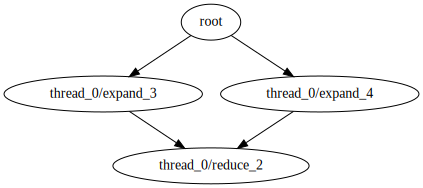

In [7]:
display(graph)